In [76]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import csv
from sklearn.decomposition import PCA


In [228]:

from scipy import stats



class Dataset(object):
    "A dataset that we load into the system"

    def __init__(self, features, target):
        ""
        self.features = features
        self.target = target

    def summary_stats(self):
        summary_stats=[]

        for var in self.features:
            sum_stats = stats.describe(var.astype(float))
            summary_stats.append(sum_stats)
        return summary_stats
    
    def plot_distribution(self,feature_number):
        fig = plt.figure()
        sns.set_style("white")
        sns.distplot(self.features[feature_number].astype(float), kde=False, rug=True)
        plt.title('Distribution Graph for Feature: '+str(feature_number))
        plt.tight_layout()
    
    def PCA_trans(self,nb_components):
        return(PCA(n_components=nb_components).fit_transform(self.features))
                                                             
    def corr_tgt(self):
        results=[]
        for i in range(0,self.features.shape[1]):
            transp=self.features.transpose()[i]
            correlation=np.corrcoef(transp.astype('float'), self.target)[0][1]
            results.append(correlation)
        return (results)
   
    def tgt_reg_plot(self, feature_number):
        var_p= self.features[:,feature_number]
        sns.regplot(var_p.astype('float'), self.target, logistic=True)
    
    

In [229]:
# import data

file=[]

with open('C:\\Users\Sonja\\Documents\\Python Scripts\\Ayasdi\\dataset_challenge.tsv') as tsvfile:
    reader = csv.reader(tsvfile, delimiter='\t')
    for row in reader:
        file.append(row)

In [230]:
data = np.array(file)

In [231]:
target = data[1:, -1].astype(int)
target.dtype
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [232]:
# replace 'na' with zero

variables = data[1:, :-1]

for var in variables:
    var[var== 'NA'] = 0
    

**Question 1**

In [233]:
df=Dataset(variables,target)

In [234]:
summary=df.summary_stats()

In [248]:
#summary

In [238]:

kurtosis = []

for sum in summary_stats:
    kurt = sum[:][:][-1]
    kurtosis.append(kurt)

In [239]:
idx = range(len(kurtosis))
zipped = dict(zip(idx, kurtosis))
zipped[0]

1.5259605445187532

In [249]:
#kurt_large = dict(filter(lambda x: x > 3))
#[v for k, v in zipped.items() if v >3]
for k, v in zipped.items():
    if v > 3:
        #print(k, v)

IndentationError: expected an indented block (<ipython-input-249-f9640f78d6d7>, line 5)

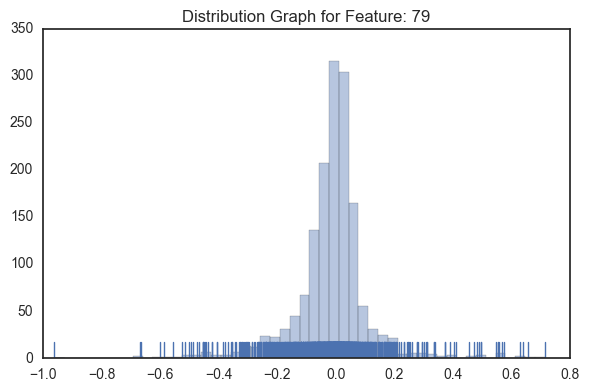

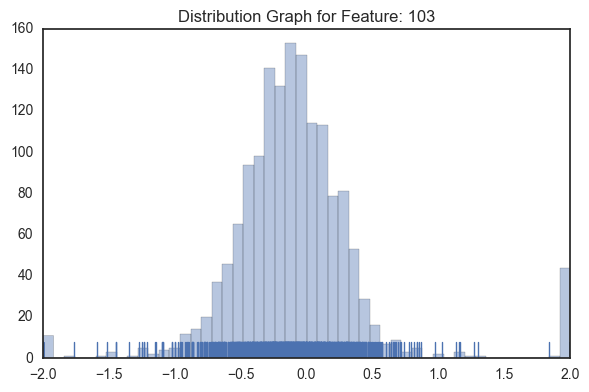

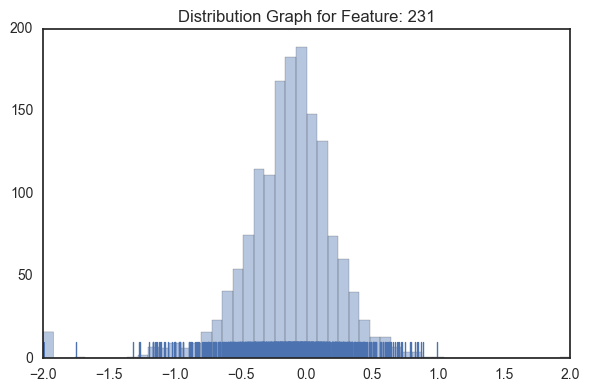

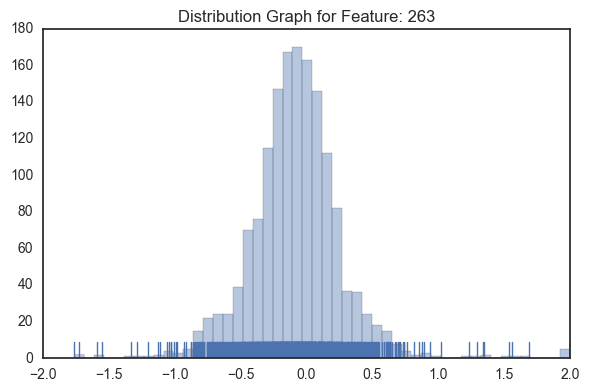

In [250]:
features_to_plot=[79,103,231,263]

for i in features_to_plot:
    df.plot_distribution(i)

The above variables have been chosen for their leptokurtic distributions, with kurtosis values above 3, which is the value for a univariate normal distribution. This means that the above distributions have fatter tails, or outliers. 
The histogram with rugplot has been chosen as it allows to plot a univariate distribution of observations and draw small vertical lines to show each observation in a distribution.

**Question 2**

In [242]:
from sklearn.decomposition import PCA

var_redux = df.PCA_trans(2)


In [243]:

redux_zipped = zip(var_redux, df.target)

colors=[]

for i in redux_zipped:
    if i[:][:][-1] ==1:
        colors.append('r')
    else:
        colors.append('b')


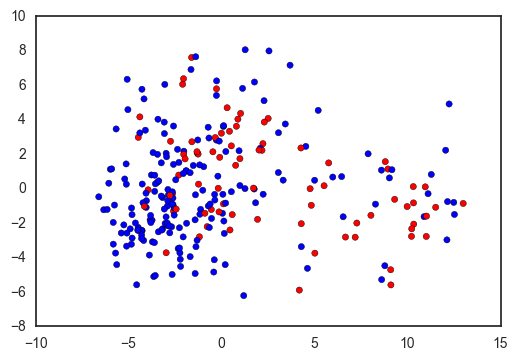

In [244]:
# plot principal components

plt.scatter(var_redux[:,0], var_redux[:,1], c=colors)

**Question 3a**

In [245]:
correlations = df.corr_tgt()
correlations

[0.0036840393203256168,
 -0.081323517747939819,
 -0.028860777985607496,
 -0.10495373160402828,
 -0.052973715134242573,
 -0.12194992380377687,
 -0.28770663685334047,
 0.076927472360619031,
 -0.071407587540666853,
 -0.077909466858096188,
 0.017477816734558067,
 -0.18614346016968825,
 -0.010090366225090051,
 -0.22148578529297641,
 0.0082074512410446453,
 -0.075763091376027783,
 -0.10347504806005452,
 -0.22201089250271633,
 0.0032705543880307999,
 0.01038554235743562,
 -0.026116516273340017,
 0.1012756220836393,
 -0.023461887238117533,
 0.10974372732380358,
 0.012944716436081145,
 0.0062258254144887141,
 -0.16197787298349978,
 -0.13442001912826579,
 -0.10795915627566581,
 -0.20282585947072468,
 -0.015441489113218526,
 -0.041242214328334026,
 0.10449451512162604,
 -0.0029346109325397618,
 0.049313431959468808,
 0.066280456949932232,
 -0.048765183848816424,
 -0.13818644801782817,
 -0.2073595526518876,
 -0.13407323883655806,
 -0.19892415902972832,
 0.15727075487145026,
 0.034949788062124974,


In [246]:
 def zip_lists(self, var, calc_corr_tgt):
        idx = range(len(var))
        zipped = dict(zip(idx, calc_corr_tgt))
        return zipped
    
    def min_max(self, zip_lists):
        minim = min(zip_lists, key=lambda k: zip_lists[k])
        maxim = min(zip_lists, key=lambda k: zip_lists[k])
        if abs(zip_lists[minim]) > abs(zip_lists[maxim]):
            return minim
        else:
            return maxim  
        return 
    
    def var_abs(self, var, min_max):
        var_abs = var[:, min_max]
        return var_abs
    
    def reg_plot(self, var_abs, tgt):
        return sns.regplot(var_abs.astype('float'), tgt, logistic=True)
        

IndentationError: unindent does not match any outer indentation level (<ipython-input-246-e1d32c793e6b>, line 6)

In [ ]:
idx2 = range(len(variables))
zipped2 = dict(zip(idx2, results))
zipped2[0]

In [ ]:
min(zipped2, key=lambda k: zipped2[k])

In [ ]:
max(zipped2, key=lambda k: zipped2[k])

In [ ]:
zipped2[67]

In [ ]:
zipped2[196]

In [ ]:
var196 = variables[:, 196]

In [ ]:
target.shape

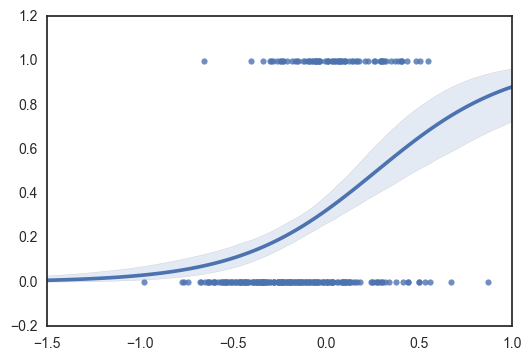

In [247]:
df.tgt_reg_plot(196)


Variable 196 was selected for visualisation as it exhibited the strongest relationship with the target variable based on correlation. The relationship is moderately positive with a correlation coefficient of +0.34.

The correlation coefficient was chosen to examine the relationship between the variables and the target variable as it represents the linear interdependence of two variables, describing the strength of the relationship and whether the relationship is negative or positive. A criticism is that the choice is overly simplistic as variables may have a non-linear relationship not captured by the metric. 
The regression plot was chosen as it permits to plot data and a linear regression model fit. Since the target is binary, we are dealing with a classification task and the plot was adjusted for this setting logistic to True (statsmodels estimates a logistic regression model).

The chart illustrates a mildly positive relationship between the variable and the target.

**Question 3b**

In [ ]:
pc1 = var_redux[:,0]

In [ ]:
results2=[]
for i in range(0,variables.shape[1]):
    uo=variables.transpose()[i]
    correlation=np.corrcoef(uo.astype('float'), pc1)[0][1]
    results2.append(correlation)

In [ ]:
idx3 = range(len(variables))
zipped3 = dict(zip(idx3, results2))
zipped3[0]

In [ ]:
min(zipped3, key=lambda k: zipped3[k])

In [ ]:
max(zipped3, key=lambda k: zipped3[k])

In [ ]:
zipped3[6]

In [ ]:
zipped3[198]

In [ ]:
var6 = variables[:, 6]

In [ ]:
sns.regplot(var6.astype('float'), pc1)

Variable 6 was selected for visualisation as it exhibited the strongest relationship with the the first principal component based on correlation.

As in question 3a, the correlation coefficient was chosen to examine the relationship between the variables and the target variable as it represents the linear interdependence of two variables, describing the strength of the relationship and whether the relationship is negative or positive. A criticism is that the choice is overly simplistic as variables may have a non-linear relationship not captured by the metric. The regression plot was chosen as it permits to plot data and a linear regression model fit. 

The chart illustrates a strong negative relationship between the variable and the first principal component.


**Question 4**

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

params = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, params, cv=5, scoring='f1_micro')

clf.fit(variables.astype('float'), target) 


In [ ]:
clf.best_params_

In [ ]:
clf.best_score_

A support vector machine classifier was chosen as it is effective when the number of features is greater than the number of samples, which is the case in this dataset. SVMs tend to work well with clear margin of separation and they are effective in high dimensional spaces.
SVMs do not perform well when a lot of 'noise' is present in the dataset.

Model performance was evaluated with cross-validation using the F1 score, as it is an appropriate evaluation metric for a classification task.
This metric can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal.  F1_micro calculates metrics globally by counting the total true positives, false negatives and false positives.

The model's best score is an F1 score of 0.72. Further performance improvements could be achieved by feature selection (e.g. through RFECV) and by addressing collinearity between features. 